<a href="https://colab.research.google.com/github/sharon-raj-1718/CE888/blob/main/my_recommender_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
jester = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv', header=None)
jester.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [4]:
jester_nan = jester.replace(99, np.nan)

In [5]:
jester_nan.isna().sum()

0         81
1       8531
2       6799
3       8341
4       9375
       ...  
96     14613
97     14463
98     14317
99     14073
100    15040
Length: 101, dtype: int64

In [6]:
len(jester[0].unique())

65

In [7]:
jester_nan.drop(columns=0, axis=1, inplace=True)

In [8]:
jester_nan.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [9]:
jester_nan.mean().sort_values(ascending=True)

58   -3.833880
16   -3.104818
44   -2.111891
57   -1.990664
13   -1.762882
        ...   
32    3.155988
27    3.189821
36    3.312500
89    3.574720
50    3.665085
Length: 100, dtype: float64

In [10]:
arr = jester_nan.values

In [11]:
np.where(arr!= 99)

(array([    0,     0,     0, ..., 24982, 24982, 24982]),
 array([ 0,  1,  2, ..., 97, 98, 99]))

In [12]:
def helper_function(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(~np.isnan(orig))
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [13]:
new_arr, idx = helper_function(arr)

In [14]:
arr[idx[0][0], idx[1][0]]

8.25

In [15]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [16]:
jester.groupby(0).count()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,...,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482
37,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,...,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409
38,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,...,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413
39,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,...,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391
40,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,...,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68
97,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
98,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71


In [18]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 5) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

In [19]:
n_latent_factors = 4

user_ratings = jester_nan.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [20]:
err  =[]
for u, i in zip(*idx):
  err.append(predict_rating(u,i) - user_ratings[u,i])
print('MSE of validation set: ', (np.array(err)**2).mean())

MSE of validation set:  27.72744203389057


In [21]:
test_idx = np.where(np.isnan(user_ratings))
for u, i in zip(*test_idx):
  print('Prediction for {} user_id for item_id {} is {}'.format(u, i, predict_rating(u,i)))

Streaming output truncated to the last 5000 lines.
Prediction for 24812 user_id for item_id 92 is 0.8204113316988149
Prediction for 24812 user_id for item_id 93 is 0.759736526384662
Prediction for 24812 user_id for item_id 94 is 0.8538561069432
Prediction for 24812 user_id for item_id 95 is 0.7902443657599827
Prediction for 24813 user_id for item_id 70 is 0.5904902470631763
Prediction for 24813 user_id for item_id 71 is 0.6132012689111576
Prediction for 24813 user_id for item_id 72 is 0.060191806098596756
Prediction for 24813 user_id for item_id 73 is 0.34220182275990296
Prediction for 24813 user_id for item_id 74 is 0.3418798381217139
Prediction for 24813 user_id for item_id 75 is 0.3940933155256054
Prediction for 24813 user_id for item_id 76 is 0.9101848061519932
Prediction for 24813 user_id for item_id 77 is 0.6761565055402762
Prediction for 24813 user_id for item_id 78 is 0.598941053014152
Prediction for 24813 user_id for item_id 79 is 0.6133085133418869
Prediction for 24813 user_i

In [23]:
test_idx

(array([    0,     0,     0, ..., 24982, 24982, 24982]),
 array([70, 71, 72, ..., 97, 98, 99]))

Iteration 0/100:	MSE=25.652842
Iteration 5/100:	MSE=24.486616
Iteration 10/100:	MSE=23.813462
Iteration 15/100:	MSE=22.945091
Iteration 20/100:	MSE=21.167428
Iteration 25/100:	MSE=18.722917
Iteration 30/100:	MSE=17.763463
Iteration 35/100:	MSE=17.474668
Iteration 40/100:	MSE=17.333030
Iteration 45/100:	MSE=17.231617
Iteration 50/100:	MSE=17.137678
Iteration 55/100:	MSE=17.033929
Iteration 60/100:	MSE=16.909005
Iteration 65/100:	MSE=16.757455
Iteration 70/100:	MSE=16.581676
Iteration 75/100:	MSE=16.393011
Iteration 80/100:	MSE=16.209252
Iteration 85/100:	MSE=16.046533
Iteration 90/100:	MSE=15.911904
Iteration 95/100:	MSE=15.803768


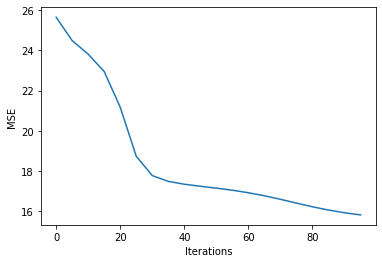

In [ ]:
num_iter = 100
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 5), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [24]:
jester_nan.iloc[55,13]

6.07

In [25]:
df_items = pd.read_excel('https://github.com/albanda/CE888/blob/master/lab4-recommender/movies_latent_factors.xlsx?raw=true')
df_users = pd.read_excel('https://github.com/albanda/CE888/blob/master/lab4-recommender/movies_latent_factors.xlsx?raw=true', sheet_name=1)

In [26]:
df_users.set_index('User', inplace=True)

In [27]:
df_items.set_index('Movie ID', inplace=True)

In [40]:
df_items[df_items['Factor8'] == df_items['Factor8'].max()]

,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
Movie ID,,,,,,,,,,,,,,,,
24,Kill Bill: Vol. 1 (2003),-0.645019,1.99744,2.085625,-1.686559,-0.047874,-1.046274,1.613575,4.630243,0.276288,0.408997,-1.148072,0.269853,0.724543,-0.385681,1.036656


In [29]:
items_latent = df_items.drop('Title', axis=1).values

In [30]:
user_latent = df_users.values

In [31]:
user_latent.shape

(25, 15)

In [32]:
items_latent.shape

(100, 15)

In [33]:
def predict_movie_rating(user, movie):
  user_arr = df_users.loc[user].values
  movie_arr = df_items.loc[movie].drop('Title').values
  return user_arr.dot(movie_arr)

In [34]:
def top_n_recommendation(user, n):
  pred = {}
  for movie in df_items.index:
    pred[movie] = predict_movie_rating(user, movie)
  pred = dict(sorted(pred.items(), key=lambda kv: kv[1], reverse=True))
  movies = list(pred.keys())
  return movies[:n]

In [37]:
predict_movie_rating(2067, 120)

-1.9595769003233463

In [ ]:
predict_movie_rating(156, 9331)

-0.041432658849076896

In [ ]:
top_n_recommendation(4940, 3)

[13, 278, 603]

In [38]:
df_items.loc[top_n_recommendation(768, 2)]['Title']

Movie ID
597         Titanic (1997)
114    Pretty Woman (1990)
Name: Title, dtype: object